In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.network import Network
from src.data import Data
from src.tools import shade
import matplotlib

In [2]:
X = np.transpose(np.genfromtxt("xi.csv", delimiter=","))
Y = np.transpose(np.genfromtxt("tau.csv", delimiter=","))
N = 50

In [5]:
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [3]:
network = Network(N)

train, test = Data.sample(X, Y)
train_errors, test_errors = network.train(train, test, t_max=100)

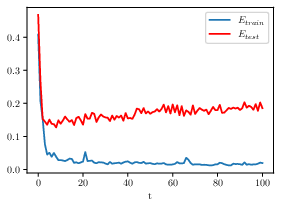

In [6]:
plt.figure(figsize=(4, 3))
plt.plot(train_errors, label="$E_{train}$")
plt.plot(test_errors, label="$E_{test}$", c="red")
plt.xlabel("t")
plt.legend()
plt.tight_layout()
plt.savefig("pictures/train_base_error.pgf")

In [7]:
fig, plots = plt.subplots(1, 2, figsize=(7, 3.5), sharey=True)
colors = [None, "red"]
for i, (plot, layer, color) in enumerate(zip(plots, network.layers, colors)):
    plot.bar(np.arange(N), layer.weights, color=color)
    plot.set_xlabel("k")
    plot.set_title(f"$w_{i + 1}$")
plots[0].set_ylabel("$w^k$")
plt.tight_layout()
plt.savefig("pictures/train_base_weight_vectors.pgf")

In [18]:
plt.close()
print(network.layers[0].weights)
print(network.layers[1].weights)
plt.bar(np.arange(N), np.sum(np.array([network.layers[0].weights, network.layers[1].weights]), axis=0))
plt.xlabel("k")
plt.ylabel("$(w_1+w_2)^k$")
plt.show()
plt.savefig("pictures/train_base_weight_vectors_sum.pgf")

[ 0.23926231  0.2169176   0.22291309  0.05362689  0.0833905  -0.47434887
  0.38104309 -0.23599751 -0.59439786 -0.01632023 -0.09258739  0.34436103
 -0.08937742  0.23604554 -0.02755313  0.11811001  0.22668301  0.28293467
  0.11749042 -0.13208692  0.0378126   0.06903261  0.05056435  0.45737908
  0.08417427  0.2565331  -0.15738221  0.04862935  0.29024817  0.35302108
  0.20582329  0.8062249  -0.22583054  0.72112833 -0.03012183  0.38780882
  0.34330108 -0.23911301 -0.12282862  0.06343323  0.32274041  0.17295974
  0.05720537  0.11213656 -0.21533602 -0.03492645  0.35410429 -0.01359495
 -0.01901594 -0.12771283]
[-0.1536353   0.14625408 -0.07602697  0.2619656   0.0529335   0.75298357
 -0.2318052   0.51022366  0.45959316  0.48456345  0.08057922 -0.2719299
  0.09737656  0.23658837 -0.11711624  0.28945292 -0.13787883  0.22664694
  0.24420938  0.32503553  0.29188166  0.15578608 -0.00968776 -0.10157803
  0.04174513  0.0677683   0.33244794  0.40719523 -0.32596506 -0.03822936
 -0.28574106 -0.25147457  

/var/folders/7q/bst9c2fs7bx9xk_rcvlsshgm0000gn/T/ipykernel_1803/4082841576.py:7: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [ ]:
fig, plots = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
colors = [None, "red"]
for plot, layer, color in zip(plots, network.layers, colors):
    plot.bar(np.arange(N), layer.weights, color=color)
plt.tight_layout()

In [ ]:
P_range = np.array([20, 50, 200, 500, 1000, 2000])
n = 10

train_errors = []
test_errors = []

for P in P_range:
    print(f"Doing {P = }")
    
    train_errors_acc = []
    test_errors_acc = []

    for _ in range(n):
        network = Network(N)
        train, test = Data.sample(X, Y, P=P)
        train_error, test_error = network.train(train, test)

        train_errors_acc.append(train_error)
        test_errors_acc.append(test_error)

    train_errors.append(np.mean(train_errors_acc, axis=0))
    test_errors.append(np.mean(test_errors_acc, axis=0))

Doing P = 20
Doing P = 50
Doing P = 200
Doing P = 500
Doing P = 1000
Doing P = 2000


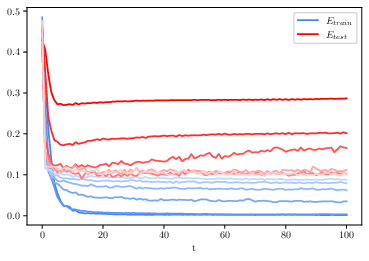

In [ ]:
colors = shade("#4287f5", "#c2d9ff", P_range.size)

for i, (train_error, test_error, P, color) in enumerate(zip(train_errors, test_errors, P_range, colors)):
    plt.plot(train_error, c=color, label="$E_{train}$" if i == 0 else None)

colors = shade("#ff0000", "#ffcccc", P_range.size)

for i, (train_error, test_error, P, color) in enumerate(zip(train_errors, test_errors, P_range, colors)):
    plt.plot(test_error, c=color, label="$E_{test}$" if i == 0 else None)

plt.xlabel("t")
plt.legend()
plt.savefig("pictures/effect_p.pgf")

<BarContainer object of 50 artists>

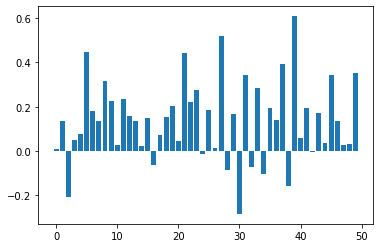

In [ ]:
max_w = None
min_w = None

weights_sum = np.sum([layer.weights for layer in network.layers], axis=0)
plt.bar(np.arange(N), weights_sum)